# Model selection in machine learning

## Load the data and Data pre-processing

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("ALL.csv") #read csv
print(df.shape)
df.head()

(103008, 10)


,Unnamed: 0,product_name,username,verification,point,date,review,detail,helpful,image
0,0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0 out of 5 stars,"Reviewed in the United States on November 22, ...",<span>Died in 2 days. Do not buy</span>,<span>Within 2 days the right ear bud stopped ...,NaN,not image
1,1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0 out of 5 stars,"Reviewed in the United States on November 22, ...",<span>Essentially worthless</span>,<span>I ordered these and another pair from 1M...,NaN,not image
2,2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0 out of 5 stars,"Reviewed in the United States on November 22, ...",<span>Great sound</span>,<span>These little buds pick up music greatly....,NaN,not image
3,3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0 out of 5 stars,"Reviewed in the United States on November 22, ...",<span>Poor sound</span>,"<span>I don’t know that $8 is worth returning,...",NaN,not image
4,4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0 out of 5 stars,"Reviewed in the United States on November 21, ...",<span>Work Great!</span>,"<span>What can you say, they're headphones. Wo...",NaN,not image


In [2]:
#delete the unreletive column
df = df.drop(["Unnamed: 0","date","image","helpful"],axis=1)
df = df.fillna('')
print(df.shape)
df.head()

(103008, 6)


,product_name,username,verification,point,review,detail
0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0 out of 5 stars,<span>Died in 2 days. Do not buy</span>,<span>Within 2 days the right ear bud stopped ...
1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0 out of 5 stars,<span>Essentially worthless</span>,<span>I ordered these and another pair from 1M...
2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0 out of 5 stars,<span>Great sound</span>,<span>These little buds pick up music greatly....
3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0 out of 5 stars,<span>Poor sound</span>,"<span>I don’t know that $8 is worth returning,..."
4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0 out of 5 stars,<span>Work Great!</span>,"<span>What can you say, they're headphones. Wo..."


In [3]:
import re

for i in range(len(df["point"])):
    str_point = df["point"][i]
    result = re.match(pattern='[0-9]\.[0-9]',string=str_point)
    df["point"][i] = result.group()
print(df.shape)
df.head()

(103008, 6)


,product_name,username,verification,point,review,detail
0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,<span>Died in 2 days. Do not buy</span>,<span>Within 2 days the right ear bud stopped ...
1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,<span>Essentially worthless</span>,<span>I ordered these and another pair from 1M...
2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,<span>Great sound</span>,<span>These little buds pick up music greatly....
3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,<span>Poor sound</span>,"<span>I don’t know that $8 is worth returning,..."
4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,<span>Work Great!</span>,"<span>What can you say, they're headphones. Wo..."


In [4]:
from bs4 import BeautifulSoup
for i in range(len(df["review"])):
    str_title = df["review"][i]
    bsObj = BeautifulSoup(str_title, 'lxml')
    df["review"][i] = bsObj.get_text()
df.head()

,product_name,username,verification,point,review,detail
0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,<span>Within 2 days the right ear bud stopped ...
1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,<span>I ordered these and another pair from 1M...
2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,<span>These little buds pick up music greatly....
3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,"<span>I don’t know that $8 is worth returning,..."
4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,"<span>What can you say, they're headphones. Wo..."


In [5]:
for i in range(len(df["detail"])):
    str_review = df["detail"][i]
    bsObj = BeautifulSoup(str_review, 'lxml')
    df["detail"][i] = bsObj.get_text()
df.head()

,product_name,username,verification,point,review,detail
0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,Within 2 days the right ear bud stopped workin...
1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,I ordered these and another pair from 1More. T...
2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,These little buds pick up music greatly. I ca...
3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,"I don’t know that $8 is worth returning, but u..."
4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,"What can you say, they're headphones. Work well."


In [6]:
#emoji
import emoji
def remove_emoji(text, replace=""):
    return emoji.replace_emoji(text,replace="")

for i in range(len(df["review"])):
    text = df["review"][i]
    res = remove_emoji(text, '')
    df["review"][i] = res

for i in range(len(df["detail"])):
    text = df["detail"][i]
    res = remove_emoji(text, '')
    df["detail"][i] = res
df.head()
df.to_csv('offemoji.csv')

In [7]:
import pandas as pd
df= pd.read_csv("offemoji.csv")
df.head()

,Unnamed: 0,product_name,username,verification,point,review,detail
0,0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,Within 2 days the right ear bud stopped workin...
1,1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,I ordered these and another pair from 1More. T...
2,2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,These little buds pick up music greatly. I ca...
3,3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,"I don’t know that $8 is worth returning, but u..."
4,4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,"What can you say, they're headphones. Work well."


In [8]:
df1 = df[df["detail"].str.len()>5]
print(df1.shape)
df1.head()

(101081, 7)


,Unnamed: 0,product_name,username,verification,point,review,detail
0,0,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",ShepardsFool,Verified Purchase,1.0,Died in 2 days. Do not buy,Within 2 days the right ear bud stopped workin...
1,1,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",jerry,Verified Purchase,1.0,Essentially worthless,I ordered these and another pair from 1More. T...
2,2,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",J. Barlow,Verified Purchase,5.0,Great sound,These little buds pick up music greatly. I ca...
3,3,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",lbt,Verified Purchase,2.0,Poor sound,"I don’t know that $8 is worth returning, but u..."
4,4,"Panasonic ErgoFit Wired Earbuds, In-Ear Headph...",Katerine Jahne,Verified Purchase,5.0,Work Great!,"What can you say, they're headphones. Work well."


In [9]:
df1['detail']=df1['detail'].fillna(999999)
find_index=df1[(df1.detail==999999)].index.tolist()
df1 = df1.drop(find_index)
print(df1.shape)

(101081, 7)


/var/folders/_0/b954bf3s3y76xgcc4xp4kyhc0000gn/T/ipykernel_3862/2458080849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['detail']=df1['detail'].fillna(999999)


In [10]:
df1.drop_duplicates(subset=['product_name','username'],keep='first',inplace=True,ignore_index=True)
df1.shape

(92480, 7)

In [11]:
import spacy 
from itertools import combinations 
 
# Set globals 
nlp = spacy.load("en_core_web_md") 
 
def pre_process(titles): 
    """ 
    Pre-processes titles by removing stopwords and lemmatizing text. 
    :param titles: list of strings, contains target titles,. 
    :return: preprocessed_title_docs, list containing pre-processed titles. 
    """ 
     
    # Preprocess all the titles 
    title_docs = [nlp(x) for x in titles] 
    preprocessed_title_docs = [] 
    lemmatized_tokens = [] 
    for title_doc in title_docs: 
        for token in title_doc: 
            if not token.is_stop: 
                lemmatized_tokens.append(token.lemma_) 
        preprocessed_title_docs.append(" ".join(lemmatized_tokens)) 
        del lemmatized_tokens[ 
            : 
            ]  # empty the lemmatized tokens list as the code moves onto a new title 
 
    return preprocessed_title_docs 

def similarity_filter(titles): 
    """ 
    Recursively check if titles pass a similarity filter. 
    :param titles: list of strings, contains titles. 
    If the function finds titles that fail the similarity test, the above param will be the function output. 
    :return: this method upon itself unless there are no similar titles; in that case the feed that was passed 
    in is returned. 
    """ 
 
    # Preprocess titles 
    preprocessed_title_docs = pre_process(titles) 
 
    # Remove similar titles 
    all_summary_pairs = list(combinations(preprocessed_title_docs, 2)) 
    similar_titles = [] 
    for pair in all_summary_pairs: 
        title1 = nlp(pair[0]) 
        title2 = nlp(pair[1]) 
        similarity = title1.similarity(title2) 
        if similarity > 0.99: 
            similar_titles.append(pair) 

    titles_to_remove = [] 
    for a_title in similar_titles: 
        # Get the index of the first title in the pair 
        index_for_removal = preprocessed_title_docs.index(a_title[0]) 
        titles_to_remove.append(index_for_removal) 
 
    # Get indices of similar titles and remove them 
    similar_title_counts = set(titles_to_remove) 
    similar_titles = [ 
        x[1] for x in enumerate(titles) if x[0] in similar_title_counts 
    ] 
    # Exit the recursion if there are no longer any similar titles 
    if len(similar_title_counts) == 0: 
        return titles 
 
    # Continue the recursion if there are still titles to remove 
    else: 
        # Remove similar titles from the next input 
        for title in similar_titles: 
            idx = titles.index(title) 
            titles.pop(idx) 
 
        return similarity_filter(titles) 

your_title_list = list(df1["detail"])
titless = similarity_filter(your_title_list)

In [12]:
df1.loc[(df1['point'] == 1.0) | (df1['point'] == 2.0)|(df1['point'] == 3.0), 'senti'] = 'neg'
df1.loc[(df1['point'] == 4.0) | (df1['point'] == 5.0), 'senti'] = 'pos'

### Prepare the data for training

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1["detail"], df1["senti"], test_size=0.2, random_state=123)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
countvect = CountVectorizer()
Xtraincount = countvect.fit_transform(X_train)
tf = TfidfTransformer(use_idf=False).fit(Xtraincount)
Xtraintf = tf.transform(Xtraincount)
tfidf = TfidfTransformer()
Xtraintfidf = tfidf.fit_transform(Xtraincount)
print(Xtraintfidf.shape)
Xtestcount = countvect.transform(X_test)
Xtesttfidf = tfidf.transform(Xtestcount)
print(Xtesttfidf.shape)

(73984, 47968)
(18496, 47968)


## SVM with linear kernel

-----------train data-----------
[[17177  3867]
 [ 2228 50712]]
              precision    recall  f1-score   support

         neg       0.89      0.82      0.85     21044
         pos       0.93      0.96      0.94     52940

    accuracy                           0.92     73984
   macro avg       0.91      0.89      0.90     73984
weighted avg       0.92      0.92      0.92     73984

-----------test data-----------
[[ 4060  1207]
 [  694 12535]]
              precision    recall  f1-score   support

         neg       0.85      0.77      0.81      5267
         pos       0.91      0.95      0.93     13229

    accuracy                           0.90     18496
   macro avg       0.88      0.86      0.87     18496
weighted avg       0.90      0.90      0.90     18496

              precision    recall  f1-score       support
neg            0.885184  0.816242  0.849316  21044.000000
pos            0.929149  0.957915  0.943312  52940.000000
accuracy       0.917617  0.917617  0.917617  

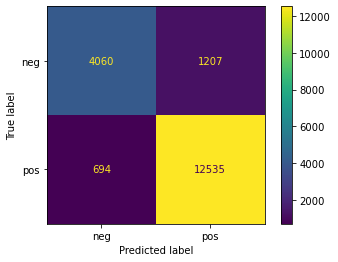

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# I choose C as 0.7
model = SVC(C=0.7,kernel="linear")
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


## SVM with poly kernel

-----------train data-----------
[[19523  1521]
 [  644 52296]]
              precision    recall  f1-score   support

         neg       0.97      0.93      0.95     21044
         pos       0.97      0.99      0.98     52940

    accuracy                           0.97     73984
   macro avg       0.97      0.96      0.96     73984
weighted avg       0.97      0.97      0.97     73984

-----------test data-----------
[[ 3945  1322]
 [  521 12708]]
              precision    recall  f1-score   support

         neg       0.88      0.75      0.81      5267
         pos       0.91      0.96      0.93     13229

    accuracy                           0.90     18496
   macro avg       0.89      0.85      0.87     18496
weighted avg       0.90      0.90      0.90     18496

              precision    recall  f1-score       support
neg            0.968067  0.927723  0.947465  21044.000000
pos            0.971738  0.987835  0.979720  52940.000000
accuracy       0.970737  0.970737  0.970737  

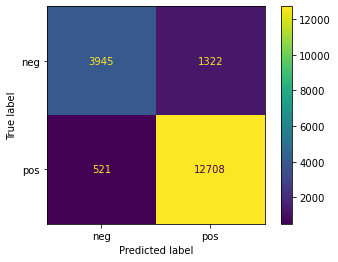

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# I choose C as 0.7
model = SVC(C=0.7,kernel="poly",degree=2)
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()




## save the model

In [20]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [24]:
filename = 'countvect.sav'
pickle.dump(countvect, open(filename, 'wb'))
filename = 'tfidf.sav'
pickle.dump(tfidf, open(filename, 'wb'))

### Parameter tuning

-----------train data-----------
[[20772   272]
 [  147 52793]]
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     21044
         pos       0.99      1.00      1.00     52940

    accuracy                           0.99     73984
   macro avg       0.99      0.99      0.99     73984
weighted avg       0.99      0.99      0.99     73984

-----------test data-----------
[[ 3510  1757]
 [  404 12825]]
              precision    recall  f1-score   support

         neg       0.90      0.67      0.76      5267
         pos       0.88      0.97      0.92     13229

    accuracy                           0.88     18496
   macro avg       0.89      0.82      0.84     18496
weighted avg       0.88      0.88      0.88     18496

              precision    recall  f1-score       support
neg            0.992973  0.987075  0.990015  21044.000000
pos            0.994874  0.997223  0.996047  52940.000000
accuracy       0.994337  0.994337  0.994337  

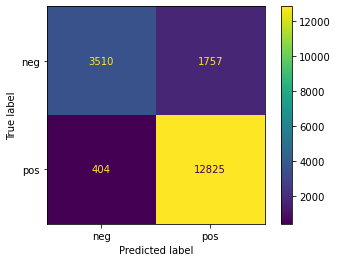

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# I choose C as 1.0
model = SVC(C=1.0,kernel="poly",degree=3)
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

-----------train data-----------
[[20254   790]
 [  429 52511]]
              precision    recall  f1-score   support

         neg       0.98      0.96      0.97     21044
         pos       0.99      0.99      0.99     52940

    accuracy                           0.98     73984
   macro avg       0.98      0.98      0.98     73984
weighted avg       0.98      0.98      0.98     73984

-----------test data-----------
[[ 4062  1205]
 [  556 12673]]
              precision    recall  f1-score   support

         neg       0.88      0.77      0.82      5267
         pos       0.91      0.96      0.94     13229

    accuracy                           0.90     18496
   macro avg       0.90      0.86      0.88     18496
weighted avg       0.90      0.90      0.90     18496

              precision    recall  f1-score       support
neg            0.979258  0.962460  0.970786  21044.000000
pos            0.985179  0.991896  0.988526  52940.000000
accuracy       0.983523  0.983523  0.983523  

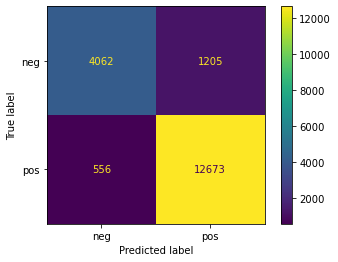

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# I choose C as 1.0
model = SVC(C=1.0,kernel="poly",degree=2)
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()



## SVM with rbf kernal

-----------train data-----------
[[18690  2354]
 [  992 51948]]
              precision    recall  f1-score   support

         neg       0.95      0.89      0.92     21044
         pos       0.96      0.98      0.97     52940

    accuracy                           0.95     73984
   macro avg       0.95      0.93      0.94     73984
weighted avg       0.95      0.95      0.95     73984

-----------test data-----------
[[ 4000  1267]
 [  592 12637]]
              precision    recall  f1-score   support

         neg       0.87      0.76      0.81      5267
         pos       0.91      0.96      0.93     13229

    accuracy                           0.90     18496
   macro avg       0.89      0.86      0.87     18496
weighted avg       0.90      0.90      0.90     18496

              precision    recall  f1-score       support
neg            0.949599  0.888139  0.917841  21044.000000
pos            0.956650  0.981262  0.968800  52940.000000
accuracy       0.954774  0.954774  0.954774  

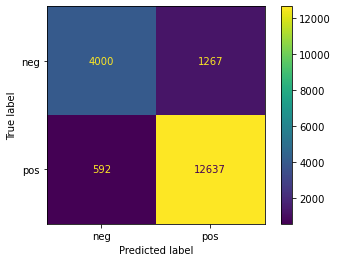

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# I choose C as 0.7
model = SVC(C=0.7,kernel="rbf")
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()




## SVM with sigmoid kernal

-----------train data-----------
[[13014  8030]
 [ 7046 45894]]
              precision    recall  f1-score   support

         neg       0.65      0.62      0.63     21044
         pos       0.85      0.87      0.86     52940

    accuracy                           0.80     73984
   macro avg       0.75      0.74      0.75     73984
weighted avg       0.79      0.80      0.79     73984

-----------test data-----------
[[ 3205  2062]
 [ 1845 11384]]
              precision    recall  f1-score   support

         neg       0.63      0.61      0.62      5267
         pos       0.85      0.86      0.85     13229

    accuracy                           0.79     18496
   macro avg       0.74      0.73      0.74     18496
weighted avg       0.79      0.79      0.79     18496

              precision    recall  f1-score       support
neg            0.648754  0.618419  0.633223  21044.000000
pos            0.851087  0.866906  0.858923  52940.000000
accuracy       0.796226  0.796226  0.796226  

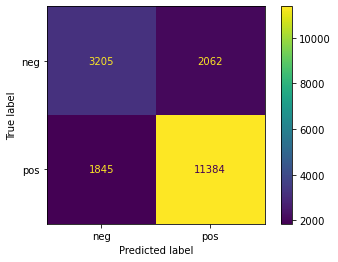

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# I choose C as 0.7
model = SVC(C=0.7,kernel="sigmoid")
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()





## NuSVC

-----------train data-----------
[[11575  9469]
 [ 1043 51897]]
              precision    recall  f1-score   support

         neg       0.92      0.55      0.69     21044
         pos       0.85      0.98      0.91     52940

    accuracy                           0.86     73984
   macro avg       0.88      0.77      0.80     73984
weighted avg       0.87      0.86      0.85     73984

-----------test data-----------
[[ 2789  2478]
 [  291 12938]]
              precision    recall  f1-score   support

         neg       0.91      0.53      0.67      5267
         pos       0.84      0.98      0.90     13229

    accuracy                           0.85     18496
   macro avg       0.87      0.75      0.79     18496
weighted avg       0.86      0.85      0.84     18496

              precision    recall  f1-score       support
neg            0.917340  0.550038  0.687719  21044.000000
pos            0.845696  0.980298  0.908036  52940.000000
accuracy       0.857915  0.857915  0.857915  

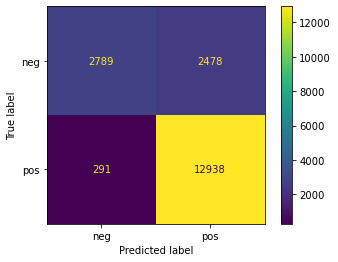

In [35]:
from sklearn.svm import NuSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# I choose C as 0.7
model = NuSVC()
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()






## LinearSVC

-----------train data-----------
[[18364  2680]
 [ 1825 51115]]
              precision    recall  f1-score   support

         neg       0.91      0.87      0.89     21044
         pos       0.95      0.97      0.96     52940

    accuracy                           0.94     73984
   macro avg       0.93      0.92      0.92     73984
weighted avg       0.94      0.94      0.94     73984

-----------test data-----------
[[ 4122  1145]
 [  749 12480]]
              precision    recall  f1-score   support

         neg       0.85      0.78      0.81      5267
         pos       0.92      0.94      0.93     13229

    accuracy                           0.90     18496
   macro avg       0.88      0.86      0.87     18496
weighted avg       0.90      0.90      0.90     18496

              precision    recall  f1-score       support
neg            0.909604  0.872648  0.890743  21044.000000
pos            0.950181  0.965527  0.957793  52940.000000
accuracy       0.939108  0.939108  0.939108  

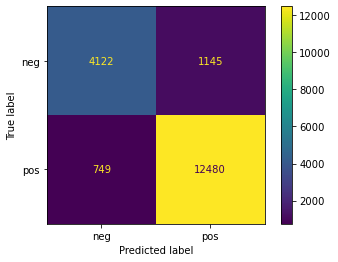

In [37]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# I choose C as 0.7
model = LinearSVC()
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()



## SGDClassifier

/Users/xiaocheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


-----------train data-----------
[[15434  5610]
 [ 2278 50662]]
              precision    recall  f1-score   support

         neg       0.87      0.73      0.80     21044
         pos       0.90      0.96      0.93     52940

    accuracy                           0.89     73984
   macro avg       0.89      0.85      0.86     73984
weighted avg       0.89      0.89      0.89     73984

-----------test data-----------
[[ 3754  1513]
 [  599 12630]]
              precision    recall  f1-score   support

         neg       0.86      0.71      0.78      5267
         pos       0.89      0.95      0.92     13229

    accuracy                           0.89     18496
   macro avg       0.88      0.83      0.85     18496
weighted avg       0.88      0.89      0.88     18496

              precision    recall  f1-score       support
neg            0.871387  0.733416  0.796470  21044.000000
pos            0.900306  0.956970  0.927774  52940.000000
accuracy       0.893382  0.893382  0.893382  

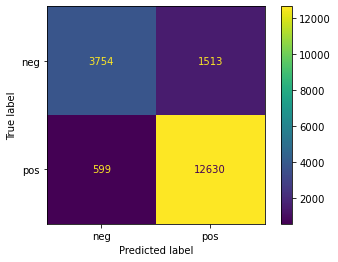

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# I choose C as 0.7
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

## RandomForestClassifier

-----------train data-----------
[[18438  2606]
 [    2 52938]]
              precision    recall  f1-score   support

         neg       1.00      0.88      0.93     21044
         pos       0.95      1.00      0.98     52940

    accuracy                           0.96     73984
   macro avg       0.98      0.94      0.95     73984
weighted avg       0.97      0.96      0.96     73984

-----------test data-----------
[[ 2418  2849]
 [  182 13047]]
              precision    recall  f1-score   support

         neg       0.93      0.46      0.61      5267
         pos       0.82      0.99      0.90     13229

    accuracy                           0.84     18496
   macro avg       0.88      0.72      0.76     18496
weighted avg       0.85      0.84      0.82     18496

              precision    recall  f1-score       support
neg            0.999892  0.876164  0.933948  21044.000000
pos            0.953082  0.999962  0.975960  52940.000000
accuracy       0.964749  0.964749  0.964749  

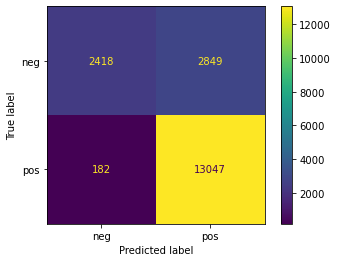

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# I choose C as 0.7
model = RandomForestClassifier(max_depth=100, random_state=0)
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

## MultinomialNB

-----------train data-----------
[[ 8972 12072]
 [  598 52342]]
              precision    recall  f1-score   support

         neg       0.94      0.43      0.59     21044
         pos       0.81      0.99      0.89     52940

    accuracy                           0.83     73984
   macro avg       0.88      0.71      0.74     73984
weighted avg       0.85      0.83      0.81     73984

-----------test data-----------
[[ 2051  3216]
 [  167 13062]]
              precision    recall  f1-score   support

         neg       0.92      0.39      0.55      5267
         pos       0.80      0.99      0.89     13229

    accuracy                           0.82     18496
   macro avg       0.86      0.69      0.72     18496
weighted avg       0.84      0.82      0.79     18496

              precision    recall  f1-score       support
neg            0.937513  0.426345  0.586137  21044.000000
pos            0.812587  0.988704  0.892036  52940.000000
accuracy       0.828747  0.828747  0.828747  

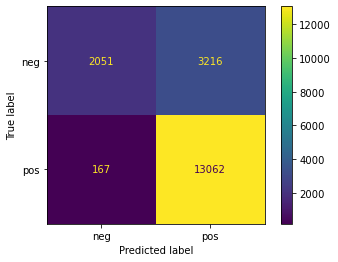

In [26]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
model = MultinomialNB()
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

## LogisticRegression

/Users/xiaocheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----------train data-----------
[[16329  4715]
 [ 2274 50666]]
              precision    recall  f1-score   support

         neg       0.88      0.78      0.82     21044
         pos       0.91      0.96      0.94     52940

    accuracy                           0.91     73984
   macro avg       0.90      0.87      0.88     73984
weighted avg       0.90      0.91      0.90     73984

-----------test data-----------
[[ 3934  1333]
 [  665 12564]]
              precision    recall  f1-score   support

         neg       0.86      0.75      0.80      5267
         pos       0.90      0.95      0.93     13229

    accuracy                           0.89     18496
   macro avg       0.88      0.85      0.86     18496
weighted avg       0.89      0.89      0.89     18496

              precision    recall  f1-score       support
neg            0.877762  0.775946  0.823719  21044.000000
pos            0.914862  0.957046  0.935479  52940.000000
accuracy       0.905534  0.905534  0.905534  

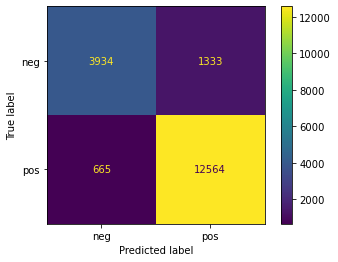

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import  matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
model = LogisticRegression(C=1.0, penalty='l2', tol=0.01)
clf = model.fit(Xtraintfidf, y_train)
predict_te = clf.predict(Xtesttfidf)
predict_tr = clf.predict(Xtraintfidf)
# Calculate the confusion matrix and classification report for the train and test data. 
# Train data
print("-----------train data-----------")
print(confusion_matrix(y_train, predict_tr))
print(classification_report(y_train, predict_tr))
# Test data
print("-----------test data-----------")
print(confusion_matrix(y_test, predict_te))
print(classification_report(y_test, predict_te))
# Save the results in a data frame. 
report_tr = classification_report(y_train, predict_tr, output_dict=True)
report_tr = pd.DataFrame(report_tr).transpose()
report_te = classification_report(y_test, predict_te, output_dict=True)
report_te = pd.DataFrame(report_te).transpose()
# display the results data frame
print(report_tr)
print(report_te)
cm = confusion_matrix(y_test, predict_te, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()